In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.getcwd()

'/Users/darsini/Downloads'

In [3]:
data = pd.read_csv("WestRoxbury_unprocessed.csv")
data.head()

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,1,0,None


In [4]:
data.shape

(5802, 12)

In [5]:
data.dtypes

TOTAL_VALUE    float64
LOT_SQFT       float64
YR_BUILT         int64
LIVING_AREA    float64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL_BATH        int64
HALF_BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object

In [6]:
data.isnull().sum()

TOTAL_VALUE    0
LOT_SQFT       1
YR_BUILT       0
LIVING_AREA    2
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL_BATH      0
HALF_BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64

In [7]:
data = data.dropna()

### Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. How many floors do the majority of the houses have?

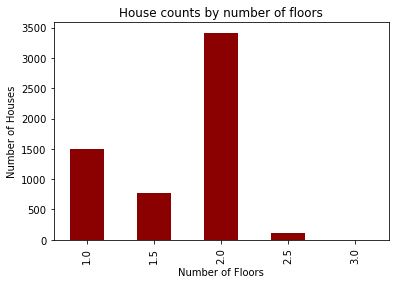

In [9]:
#Floor counts in houses
floor_counts = data['FLOORS'].value_counts().sort_index()

#Visualization
floor_counts.plot(kind = 'bar', color = 'darkred')
plt.title('House counts by number of floors')
plt.xlabel('Number of Floors')
plt.ylabel('Number of Houses')
plt.show()

#### 2. How many rooms do the majority of the houses have?

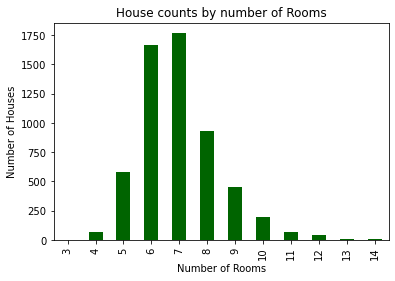

In [10]:
#Room counts in houses
room_counts = data['ROOMS'].value_counts().sort_index()

#Visualization
room_counts.plot(kind = 'bar', color = 'darkgreen')
plt.title('House counts by number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Houses')
plt.show()

#### 3. How many bedrooms do the majority of the houses have?

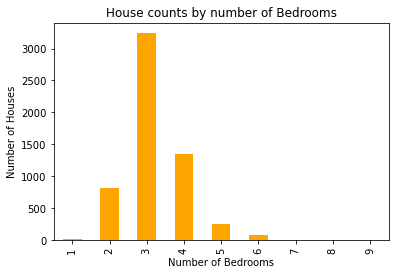

In [11]:
#Bedroom counts in houses
bedroom_counts = data['BEDROOMS'].value_counts().sort_index()

#Visualization
bedroom_counts.plot(kind = 'bar', color = 'orange')
plt.title('House counts by number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses')
plt.show()

#### 4. Are there more houses that are recently remodeled, or more houses that are not remodeled at all?

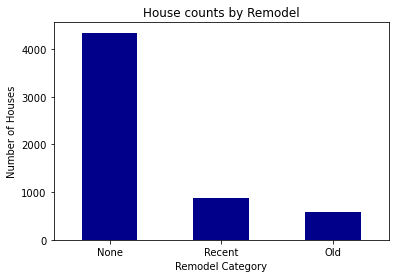

In [12]:
#Bedroom counts in houses
remodel_counts = data['REMODEL'].value_counts()

#Visualization
remodel_counts.plot (kind = 'bar', color = 'darkblue')
plt.title ('House counts by Remodel')
plt.xlabel('Remodel Category')
plt.ylabel('Number of Houses')
plt.xticks(rotation = 0)
plt.show()

#### 5. What is the trend of house values with respect to the size of the living area?

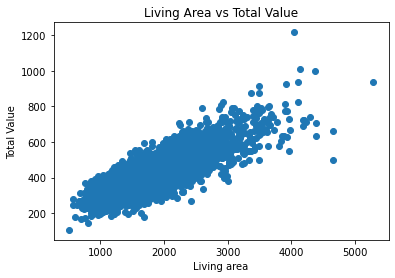

In [13]:
# LIVING_AREA vs. TOTAL_VALUE plot

plt.scatter(data['LIVING_AREA'], data['TOTAL_VALUE'])
plt.title ('Living Area vs Total Value')
plt.xlabel('Living area')
plt.ylabel('Total Value')
plt.show()

#### 6. Identifying the attributes that are highly correlated to 'Total Value'

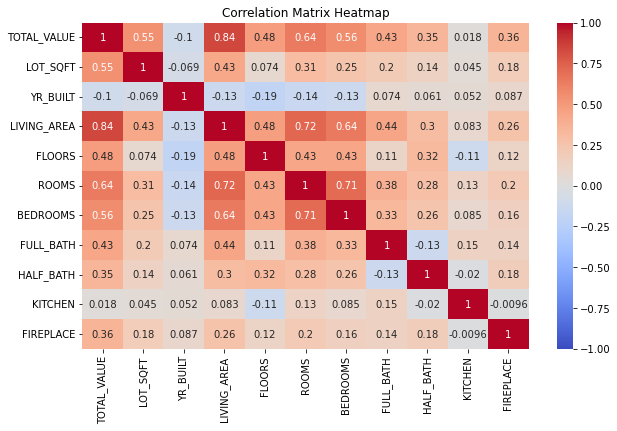

In [18]:
# Compute the correlation matrix
correlation_matrix = data.corr()

#Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Data Processing

#### 1. Identifying relationships between the predictor variables, to find any potential multicollinearity problem

Focusing on the predictors helps in getting a clear understanding of the relationships among them, which can be useful when considering feature selection.

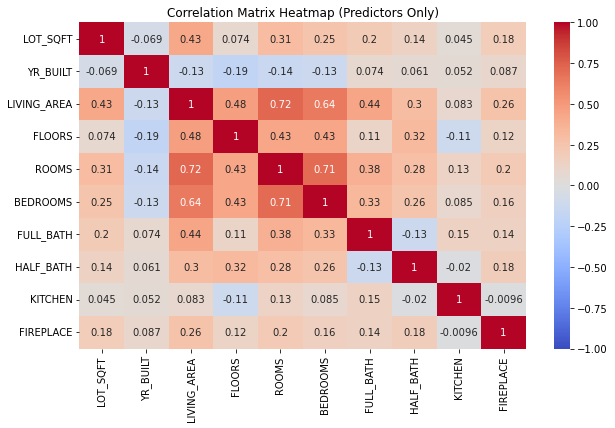

In [25]:
# Drop the target variable 'TOTAL_VALUE' from the correlation matrix
predictors_correlation = correlation_matrix.drop('TOTAL_VALUE', axis=0).drop('TOTAL_VALUE', axis=1)

#Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(predictors_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (Predictors Only)")
plt.show()

From the correlation matrix among predictors, we observe the following pairs of predictors with high correlations (greater than 0.7), which suggest that they convey similar information.

- ROOMS and LIVING_AREA have a correlation of approximately 0.721.
- ROOMS and BEDROOMS have a correlation of approximately 0.711.

#### 2. Dropping 'Rooms' Predictor

In [28]:
data = data.drop('ROOMS', axis=1)
data.head()

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880,1352.0,2.0,3,1,1,1,0,None
1,412.6,6590.0,1945,1976.0,2.0,4,2,1,1,0,Recent
2,330.1,7500.0,1890,1371.0,2.0,4,1,1,1,0,None
3,498.6,13773.0,1957,2608.0,1.0,5,1,1,1,1,None
4,331.5,5000.0,1910,1438.0,2.0,3,2,0,1,0,None


#### 3. Dealing with Categorical variables

Handling categorical variables is a crucial step in preparing data for many machine learning algorithms, especially linear regression models which require numerical input features.

In [33]:
data = pd.get_dummies(data, columns = ['REMODEL'], drop_first=True)

In [34]:
data.head()

,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,9965.0,1880,1352.0,2.0,3,1,1,1,0,0,0
1,412.6,6590.0,1945,1976.0,2.0,4,2,1,1,0,0,1
2,330.1,7500.0,1890,1371.0,2.0,4,1,1,1,0,0,0
3,498.6,13773.0,1957,2608.0,1.0,5,1,1,1,1,0,0
4,331.5,5000.0,1910,1438.0,2.0,3,2,0,1,0,0,0


#### 4. Splitting the Data into Train and Test

In [36]:
from sklearn.model_selection import train_test_split

# Separate the target variable and the predictor variables
X = data.drop('TOTAL_VALUE', axis=1)
y = data['TOTAL_VALUE']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.shape, X_test.shape

((4059, 11), (1740, 11))

#### 5. Normalizing the data

In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_normalized = scaler.fit_transform(X_train)

# Use the scaler to transform the testing data
X_test_normalized = scaler.transform(X_test)

# Display the first few rows of the normalized training data
X_train_normalized[:5]


array([[-1.01825194, -0.13668751, -0.14894268,  0.70815091, -0.27382895,
        -0.56877112,  0.73341214, -0.12352177,  0.45983812, -0.33792248,
        -0.41852029],
       [-0.39583224,  0.04023041, -0.48132253,  0.70815091, -0.27382895,
        -0.56877112,  0.73341214, -0.12352177,  0.45983812, -0.33792248,
        -0.41852029],
       [ 1.8467997 ,  0.34351829, -0.64751246, -0.42171723, -1.46639517,
        -0.56877112,  0.73341214, -0.12352177,  0.45983812, -0.33792248,
        -0.41852029],
       [-0.84996809,  0.09077839, -0.93557499, -1.55158537, -0.27382895,
        -0.56877112,  0.73341214, -0.12352177,  0.45983812, -0.33792248,
         2.3893704 ],
       [-0.29286405, -0.1619615 ,  0.17605096,  0.70815091, -0.27382895,
        -0.56877112,  0.73341214, -0.12352177, -1.30766466, -0.33792248,
        -0.41852029]])

### Building the multiple linear regression model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on the normalized training data
lr_model.fit(X_train_normalized, y_train)

LinearRegression()

#### 1. Predicting the Test results

In [42]:
# Predict on the normalized testing data
y_pred = lr_model.predict(X_test_normalized)
y_pred

array([327.29848193, 376.99449826, 383.87464759, ..., 316.36096386,
       268.40665315, 363.21122227])

#### 2. Co-efficient and Intercept

In [43]:
print('intercept', lr_model.intercept_)
print(pd.DataFrame({'Predictor':X.columns, 'coefficient': lr_model.coef_}))

intercept 392.4306903178122
         Predictor  coefficient
0         LOT_SQFT    23.247920
1         YR_BUILT    -0.177648
2      LIVING_AREA    53.262470
3           FLOORS    12.762011
4         BEDROOMS     0.680523
5        FULL_BATH    10.122671
6        HALF_BATH    10.537023
7          KITCHEN    -3.926255
8        FIREPLACE    11.386548
9      REMODEL_Old     2.765489
10  REMODEL_Recent     9.727949


#### 3. Calculating the Performance Metrics

In [46]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(2007.3349829045665, 0.8135908520023696)

- The r2 score indicates that approximately 80.39% of the variance in the TOTAL_VALUE can be explained by the model.

### Evaluation

#### 1. Checking the Performance on training set to identify any overfit issues

The performance can be measured using the percentage of accuracy observed in both training and test datasets to conclude the presence of overfitting.

If the model performs better in the training set than in the test set, the model is likely to be overfitting.

In [48]:
# Predicting on the training set
y_train_pred = lr_model.predict(X_train_normalized)

# Calculating performance metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_train, r2_train, mse, r2

(1940.2000136746176,
 0.7943698350816359,
 2007.3349829045665,
 0.8135908520023696)

- The training and testing r2 scores are quite close, and the testing score is even slightly higher than the training score. This suggests that the model generalizes well to new data and is neither overfitting nor underfitting.

#### 2. Residual Distribution

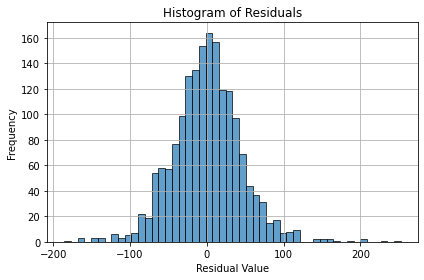

In [50]:
import matplotlib.pyplot as plt

# Calculating residuals for the test set
residuals = y_test - y_pred

# Plotting a histogram of the residuals
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

- The residuals are approximately normally distributed around zero, which is a good sign. This indicates that our model's errors are random and not biased in one particular direction.
- There are a few larger residuals, but they appear less frequently.

A roughly normal distribution of residuals is one of the assumptions of linear regression, and this histogram suggests that our model meets this assumption reasonably well.

#### For the given dataset, the model seems to be normal and can be implemented for the final assessment of total value of the property.